Reproduce the experiments from Example 7.1 in the book "Applied Numerical Linear Algebra" by J. Demmel. Link: http://www.stat.uchicago.edu/~lekheng/courses/302/demmel/demmch7.pdf

In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from matrix import *
from utils import *
from plot_utils import plot_spectrum_combined, get_esd_plot, plot_lanczos_iterations

In [3]:
mtx_size = 100
num_iterations = 20 # number of steps of the Lanczos algorithm to visualize
seed = 10 # set seed to have the same starting vector v1 (for the Lanczos algorithm) in all expetiments

#### Generate eigenvalues

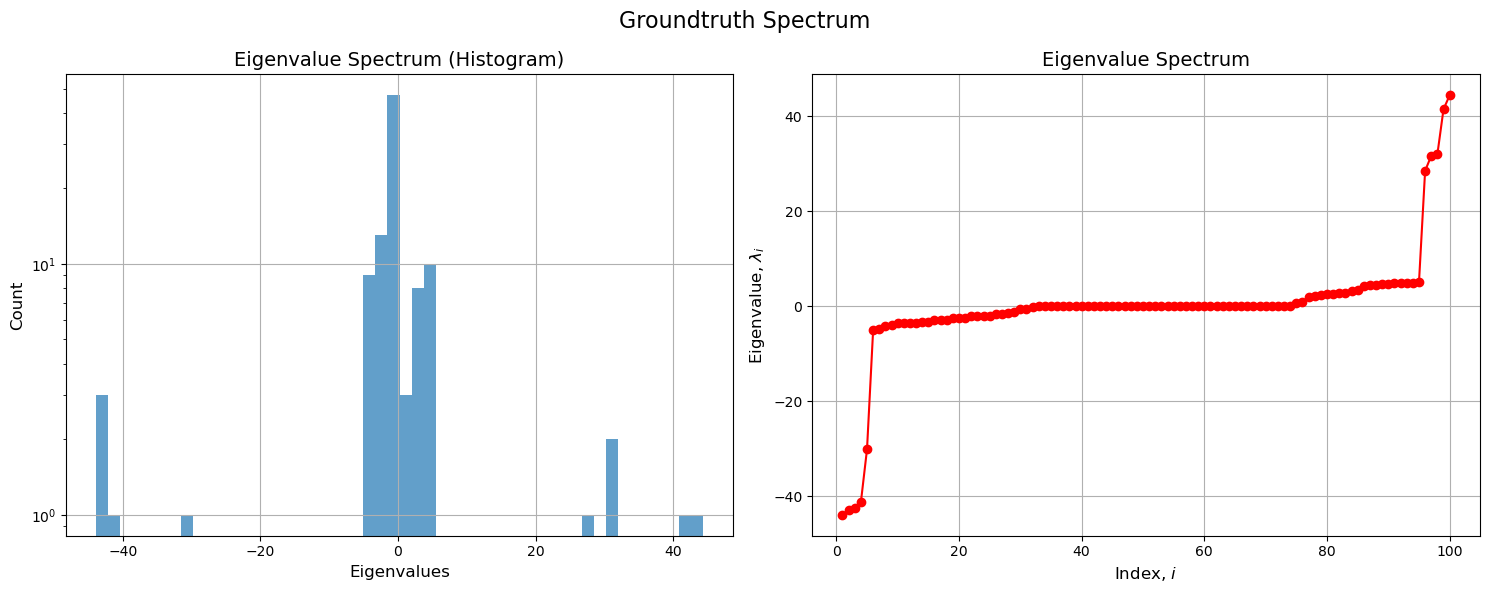

In [4]:
num_bins = 50 # number of bins for the histograms
dict_eigenvalues = {
	'num_around_zero': 50,
	'around_zero_low': -5,
	'around_zero_high': 5,
	'num_pos_extremes': 10,
	'pos_low': 25,
	'pos_high': 50,
	'num_neg_extremes': 10,
	'neg_low': -50,
	'neg_high': -25
}
eigenvalues = generate_eigenvalues(mtx_size, dict_eigenvalues)
plot_spectrum_combined(eigenvalues.numpy(), num_bins=num_bins, title='Groundtruth Spectrum')

#### Matrix computation module

In [5]:
mtx = matrix(eigenvalues)

#### Sanity check

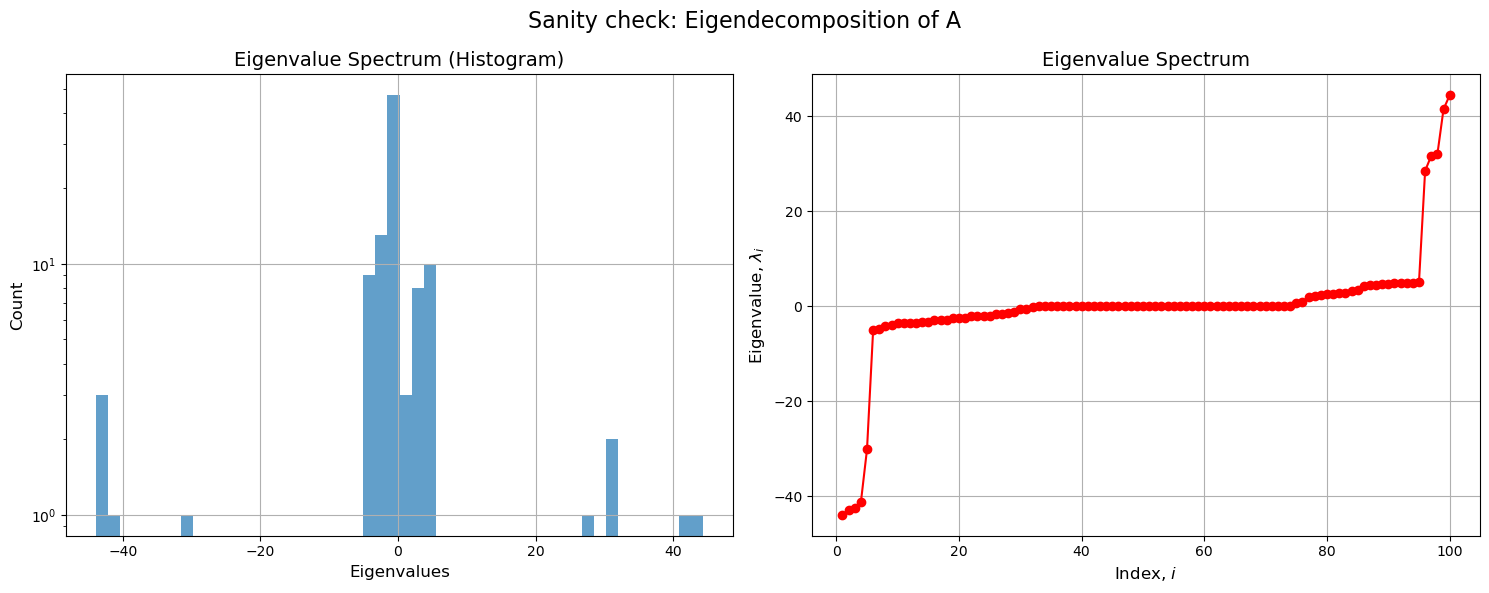

L2 distance: 0.00016138487262651324


In [6]:
A = mtx.get_matrix() # form matrix from eigenvalues and u_vectors
eigenvalues_A, _ = torch.linalg.eig(A)
eigenvalues_A = eigenvalues_A.real  # cast to real numbers
plot_spectrum_combined(eigenvalues_A.numpy(), num_bins=num_bins, title='Sanity check: Eigendecomposition of A') 
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, eigenvalues_A, 2)}")

#### Slow Lanczos algorithm (PyHessian version)

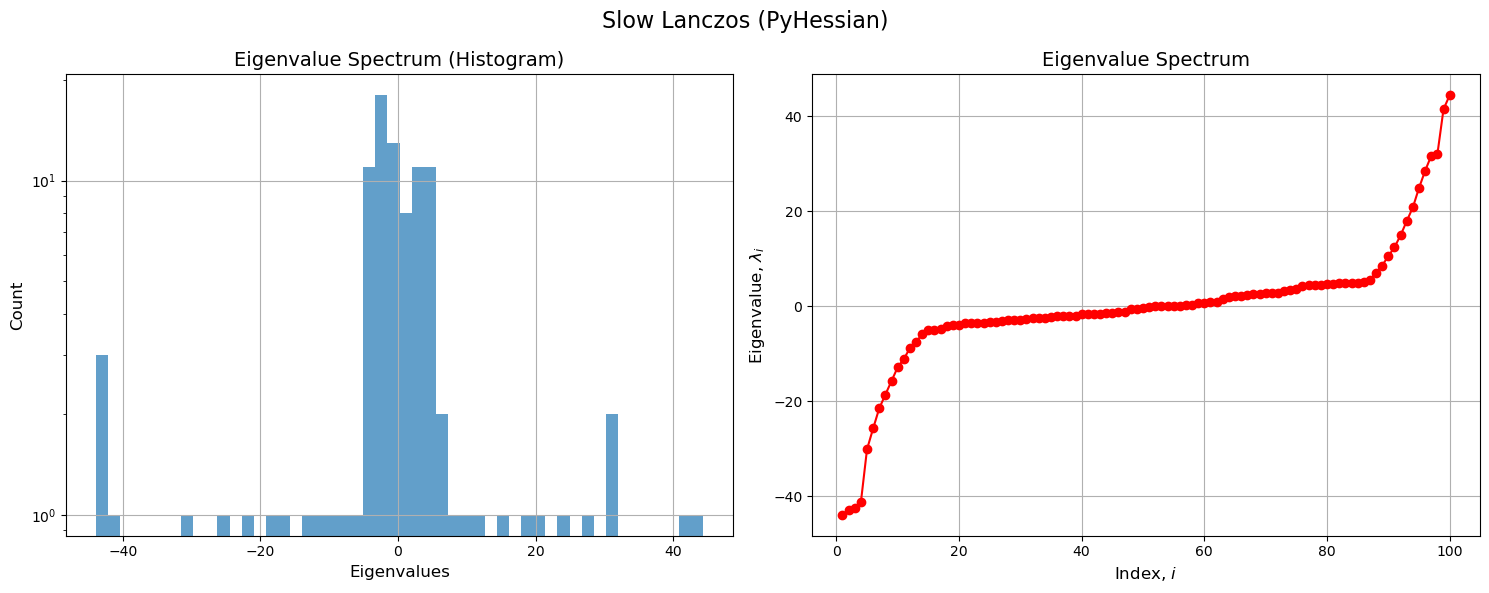

L2 distance: 50.18410110473633


In [7]:
eigenvalues_slow_lanczos, _ = mtx.slow_lanczos_pyhessian(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos, num_bins=num_bins, title='Slow Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos), 2)}")

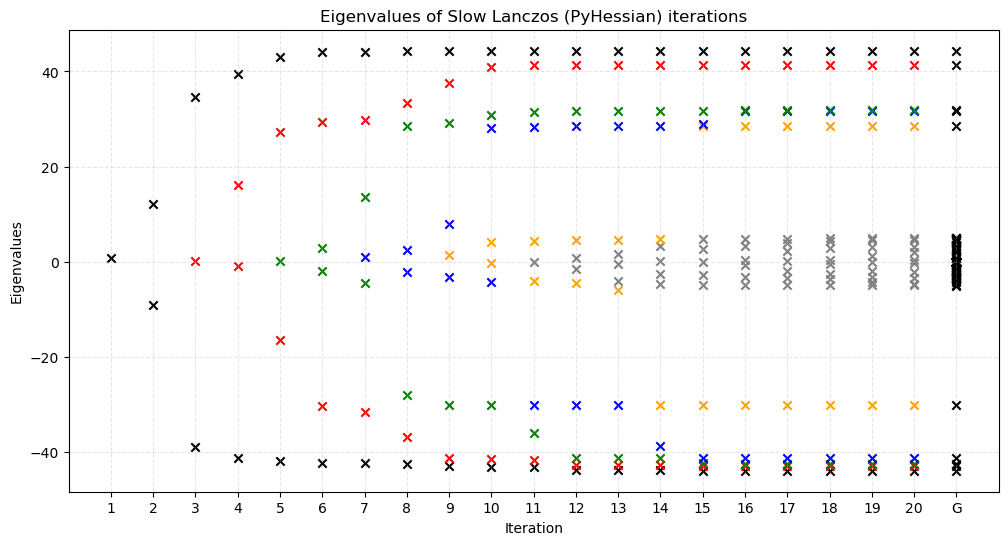

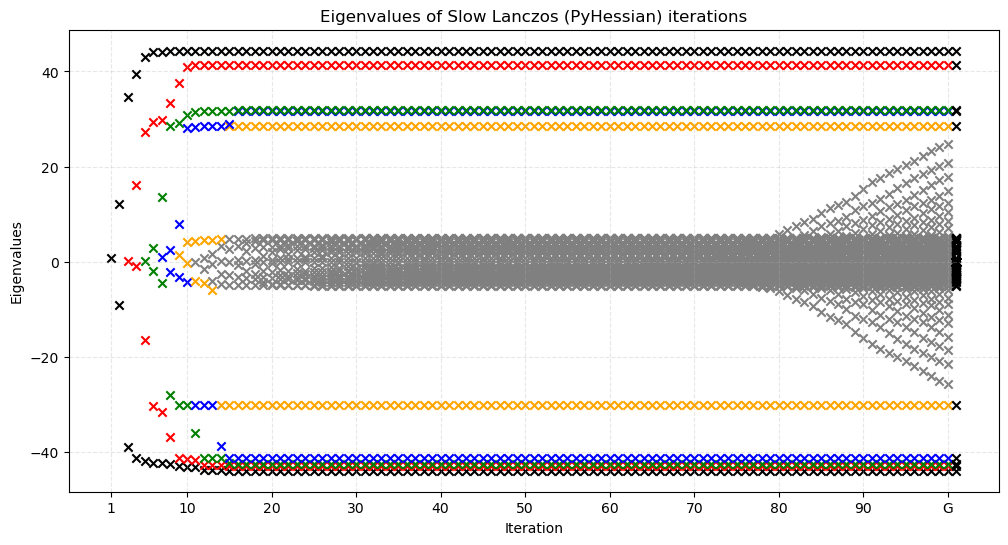

In [8]:
eigenvalues_slow_lanczos = []
for iter in range(num_iterations):
    result, _ = mtx.slow_lanczos_pyhessian(iter+1, seed=seed)
    eigenvalues_slow_lanczos.append(result)
eigenvalues_slow_lanczos.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos, "Slow Lanczos (PyHessian)")
eigenvalues_slow_lanczos.pop()
for iter in range(num_iterations, 100):
    result, _ = mtx.slow_lanczos_pyhessian(iter+1, seed=seed)
    eigenvalues_slow_lanczos.append(result)
eigenvalues_slow_lanczos.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos, "Slow Lanczos (PyHessian)")

#### Slow Lanczos algorithm (Papyan's version)

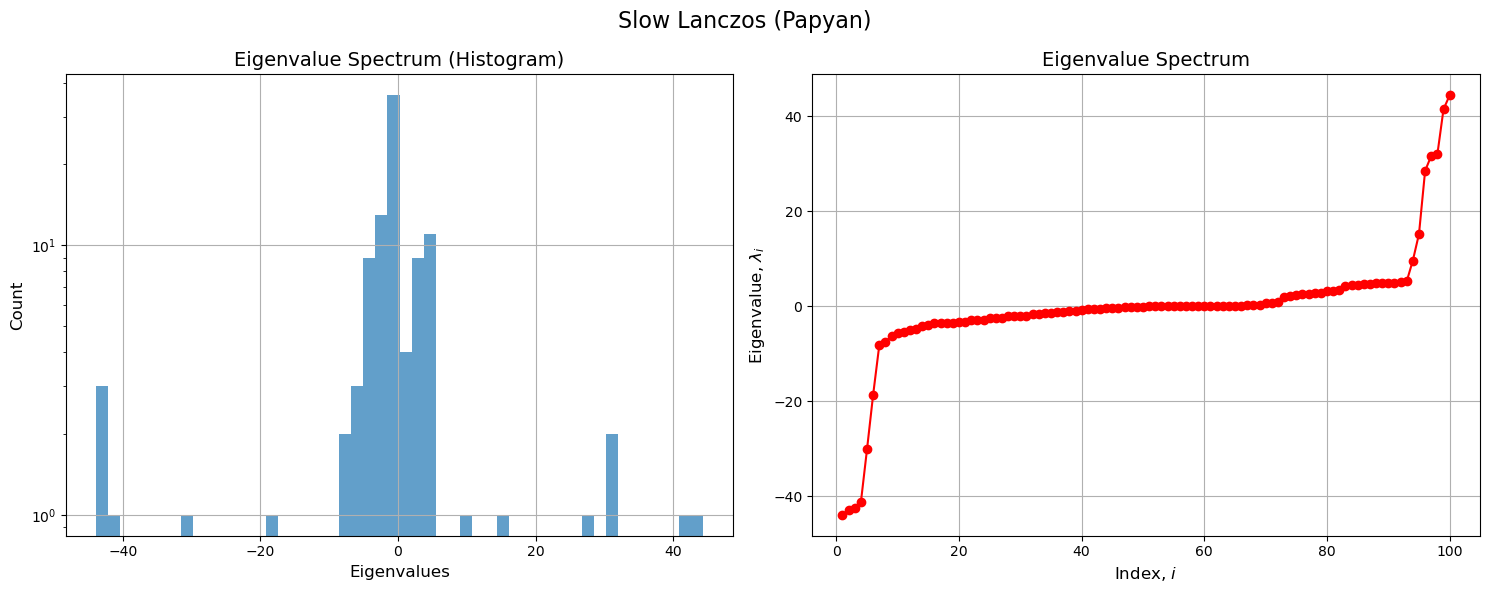

L2 distance: 20.131210327148438


In [9]:
eigenvalues_slow_lanczos_papyan, _ = mtx.slow_lanczos_papyan(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_papyan, num_bins=num_bins, title='Slow Lanczos (Papyan)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_papyan), 2)}")

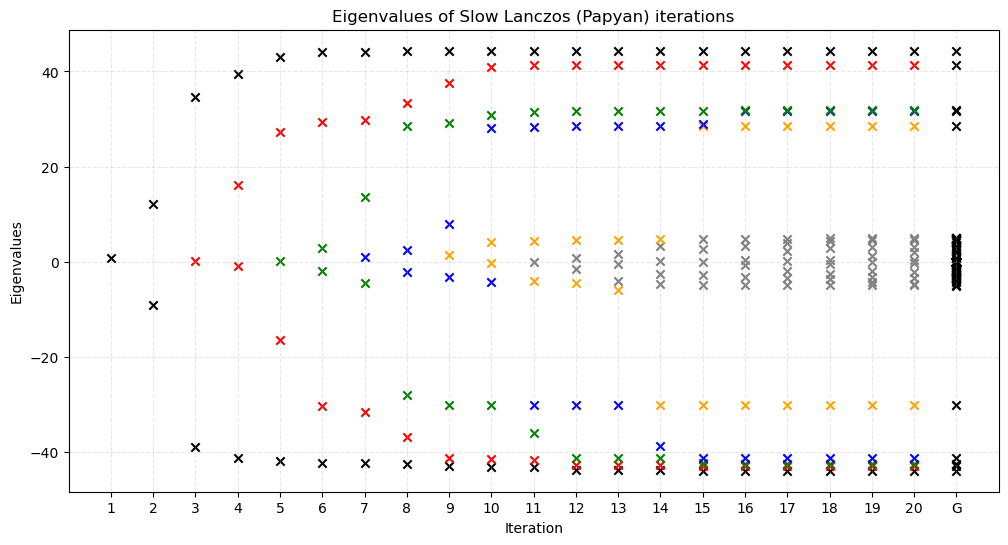

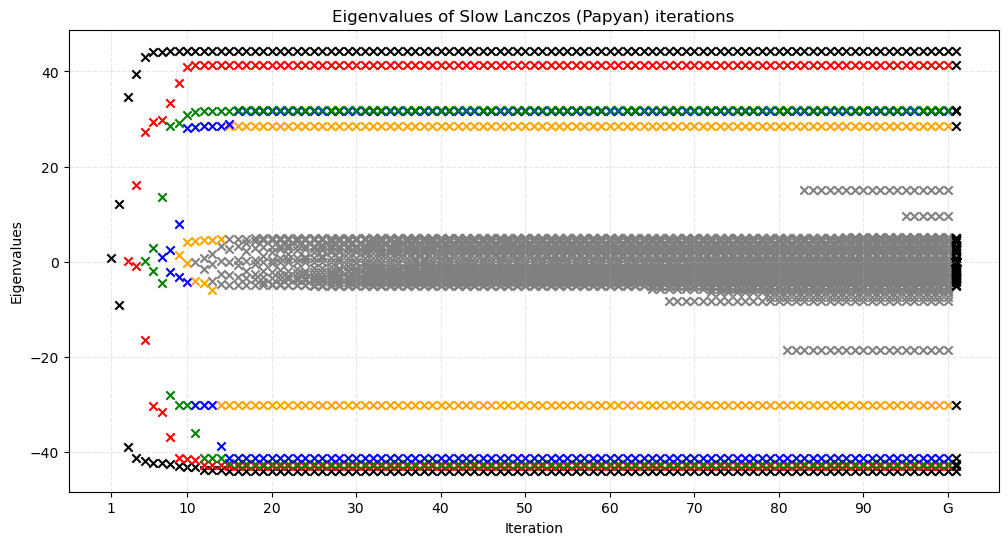

In [10]:
eigenvalues_slow_lanczos_papyan = []
for iter in range(num_iterations):
    result, _ = mtx.slow_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_slow_lanczos_papyan.append(result)
eigenvalues_slow_lanczos_papyan.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_papyan, "Slow Lanczos (Papyan)")
eigenvalues_slow_lanczos_papyan.pop()
for iter in range(num_iterations, 100):
    result, _ = mtx.slow_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_slow_lanczos_papyan.append(result)
eigenvalues_slow_lanczos_papyan.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_papyan, "Slow Lanczos (Papyan)")

#### Slow Lanczos algorithm (Demmel's version)

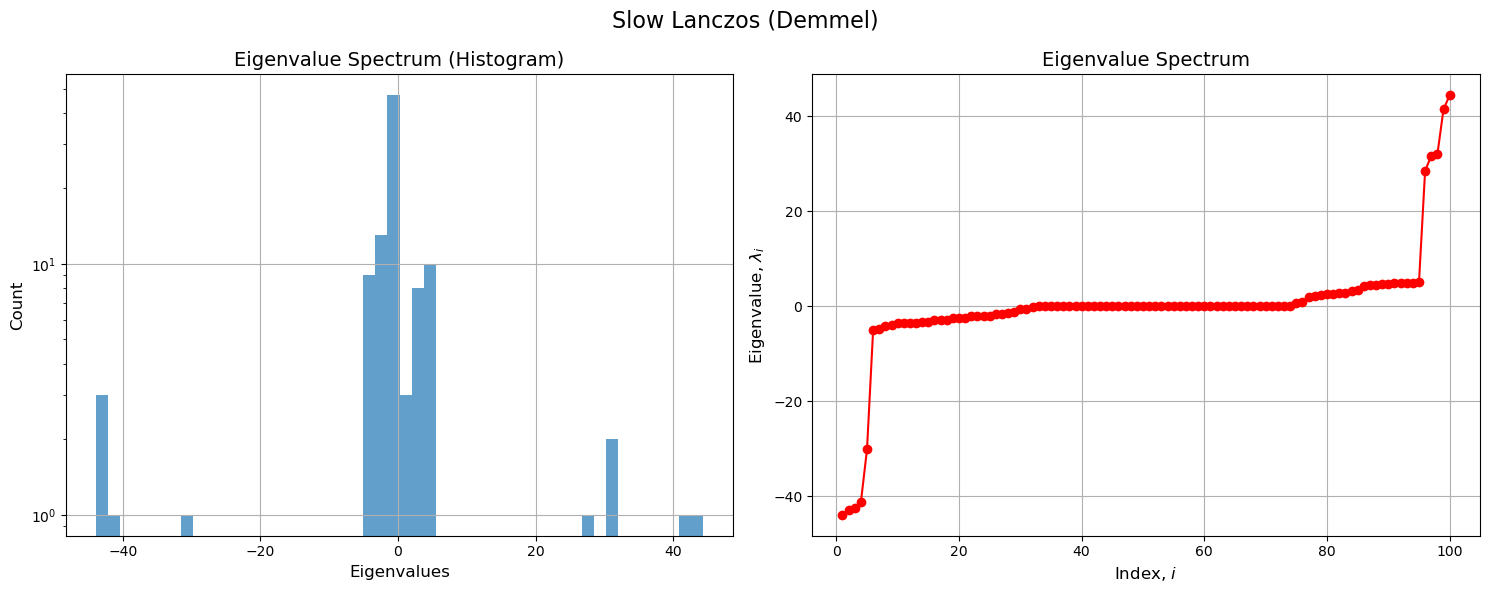

L2 distance: 5.8666806580731645e-05


In [12]:
eigenvalues_slow_lanczos_demmel, _ = mtx.slow_lanczos_demmel(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_demmel, num_bins=num_bins, title='Slow Lanczos (Demmel)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_demmel), 2)}")

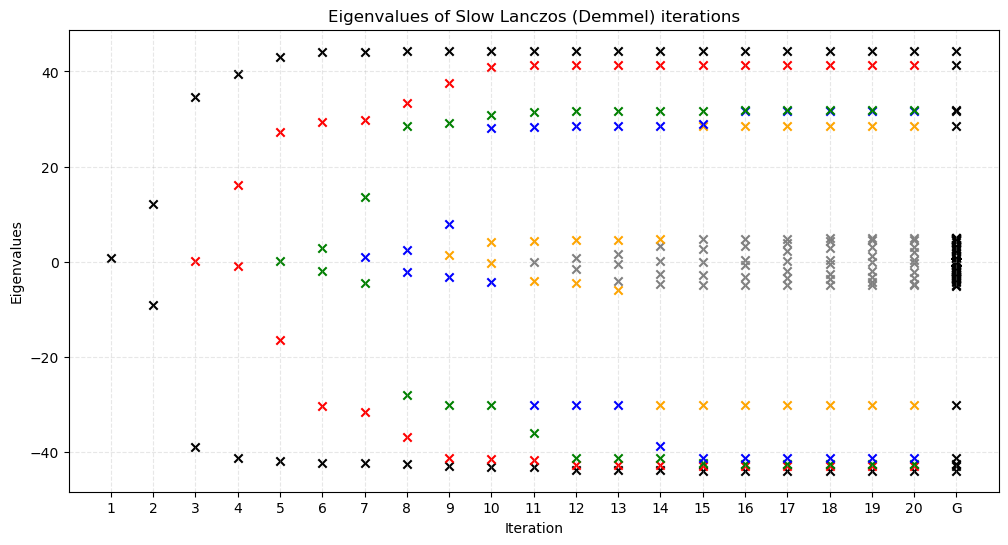

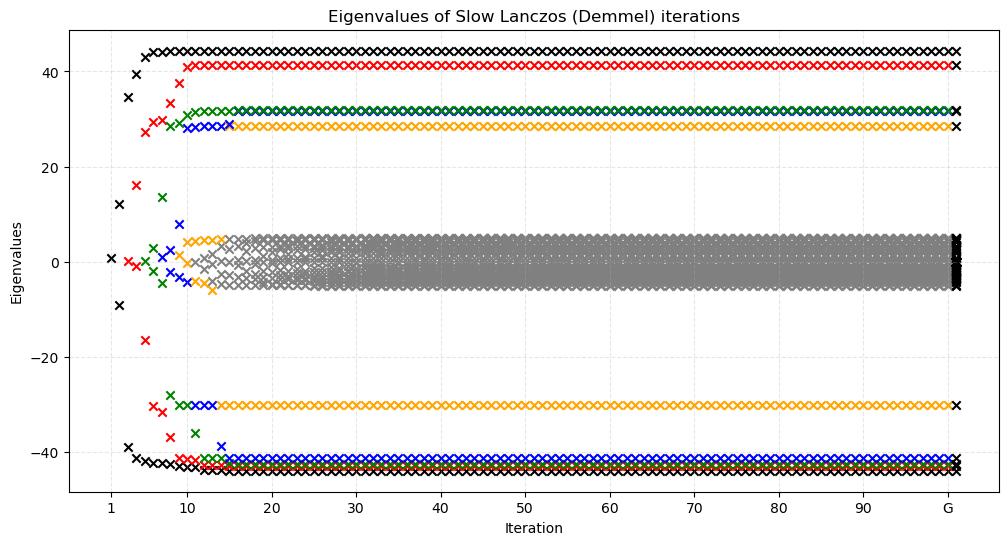

In [13]:
eigenvalues_slow_lanczos_demmel = []
for iter in range(num_iterations):
    result, _ = mtx.slow_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_slow_lanczos_demmel.append(result)
eigenvalues_slow_lanczos_demmel.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_demmel, "Slow Lanczos (Demmel)")
eigenvalues_slow_lanczos_demmel.pop()
for iter in range(num_iterations, 100):
    result, _ = mtx.slow_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_slow_lanczos_demmel.append(result)
eigenvalues_slow_lanczos_demmel.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_demmel, "Slow Lanczos (Demmel)")

#### Fast Lanczos algorithm (Papyan's version)

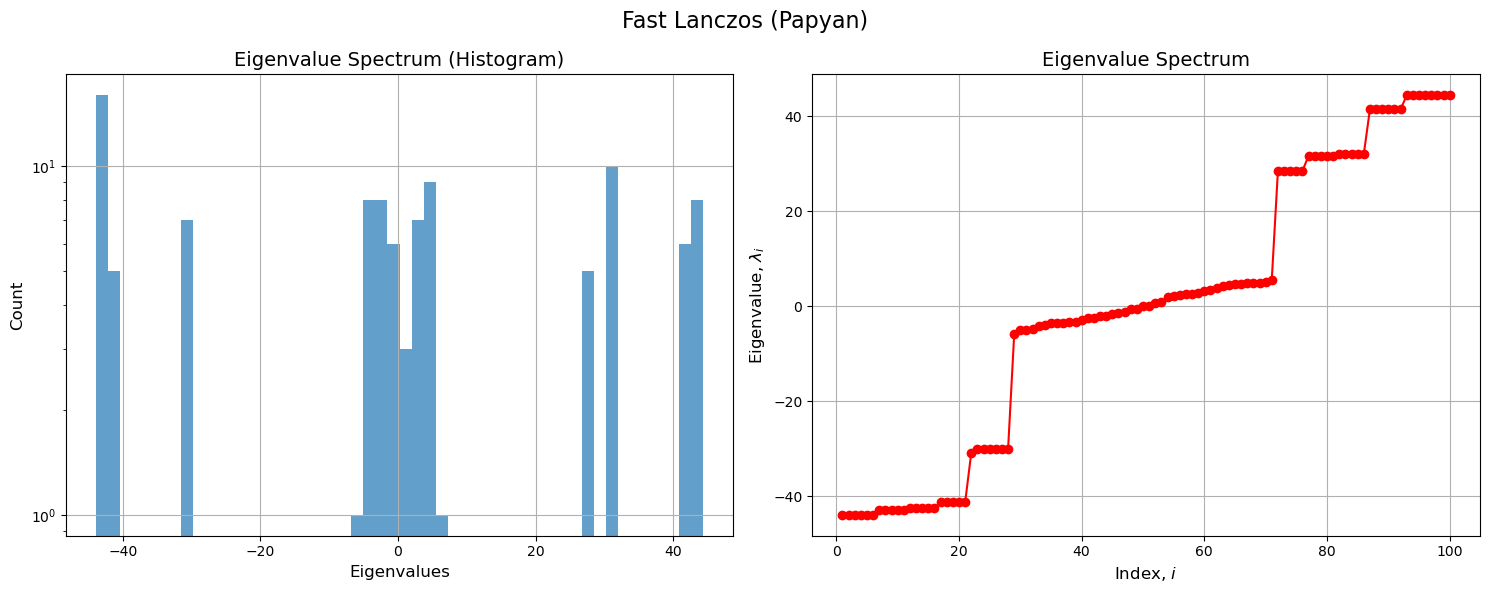

L2 distance: 236.927734375


In [14]:
eigenvalues_fast_lanczos_papyan, _ =  mtx.fast_lanczos_papyan(mtx_size)
plot_spectrum_combined(eigenvalues_fast_lanczos_papyan, num_bins=num_bins, title='Fast Lanczos (Papyan)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_papyan), 2)}")

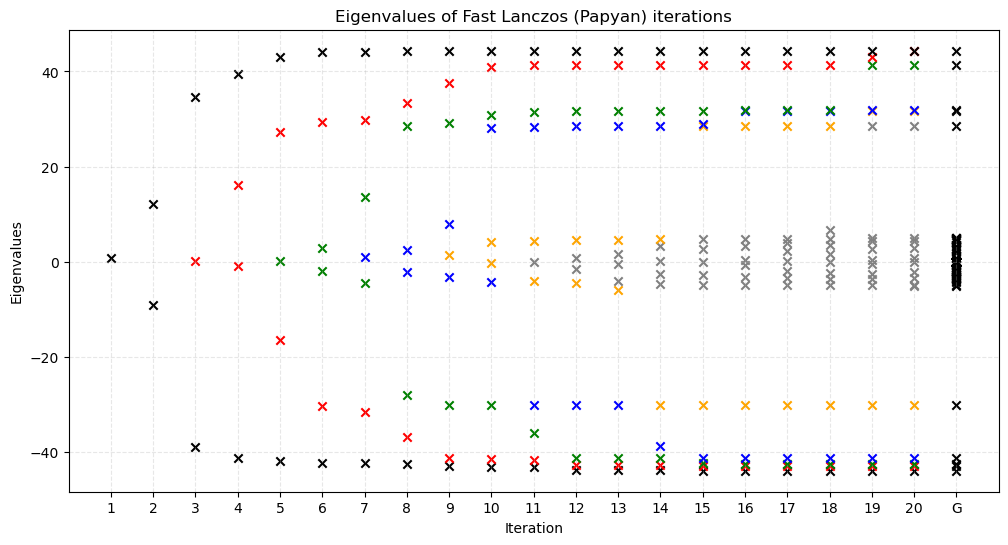

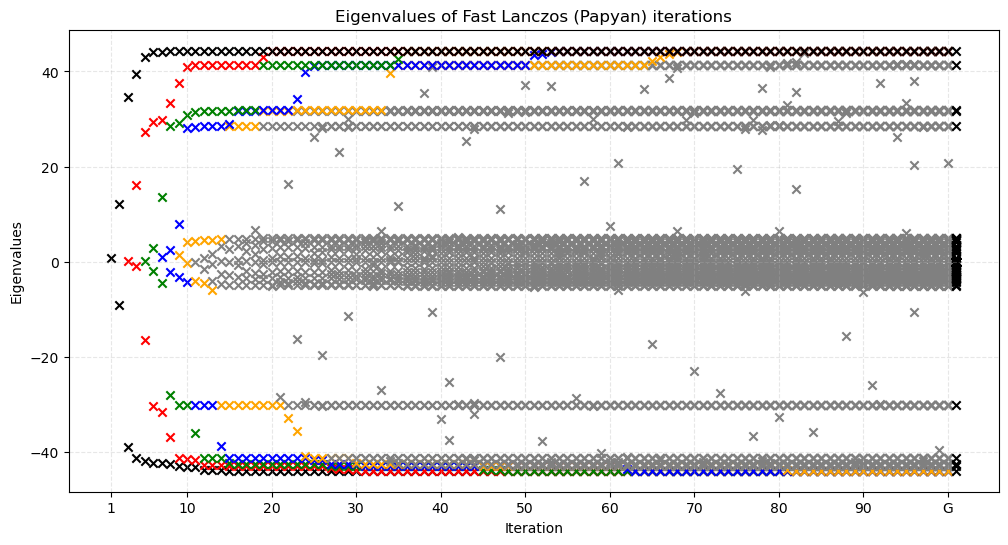

In [16]:
eigenvalues_fast_lanczos_papyan = []
for iter in range(num_iterations):
    result, _ = mtx.fast_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_fast_lanczos_papyan.append(result)
eigenvalues_fast_lanczos_papyan.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_papyan, "Fast Lanczos (Papyan)")
eigenvalues_fast_lanczos_papyan.pop()
for iter in range(num_iterations, 100):
    result, _ = mtx.fast_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_fast_lanczos_papyan.append(result)
eigenvalues_fast_lanczos_papyan.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_papyan, "Fast Lanczos (Papyan)")

#### Fast Lanczos algorithm (Demmel's version)

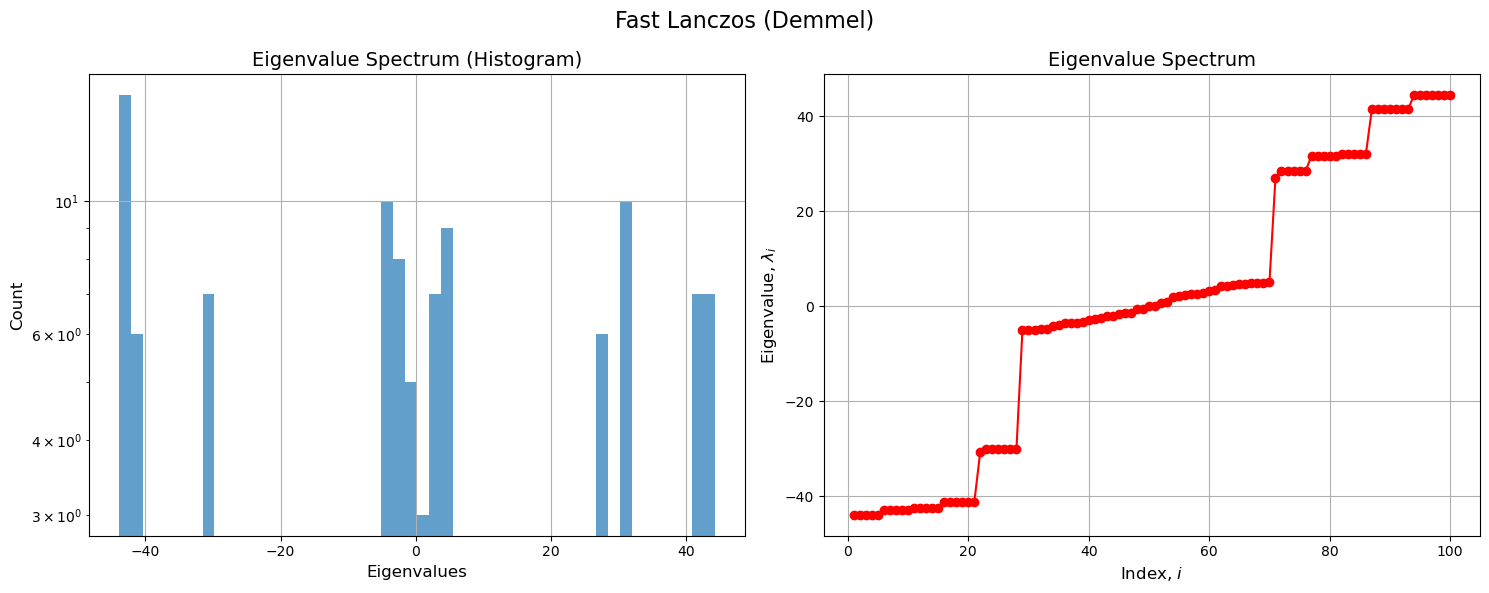

L2 distance: 237.4998779296875


In [17]:
eigenvalues_fast_lanczos_demmel, _ =  mtx.fast_lanczos_demmel(mtx_size)
plot_spectrum_combined(eigenvalues_fast_lanczos_demmel, num_bins=num_bins, title='Fast Lanczos (Demmel)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_demmel), 2)}")

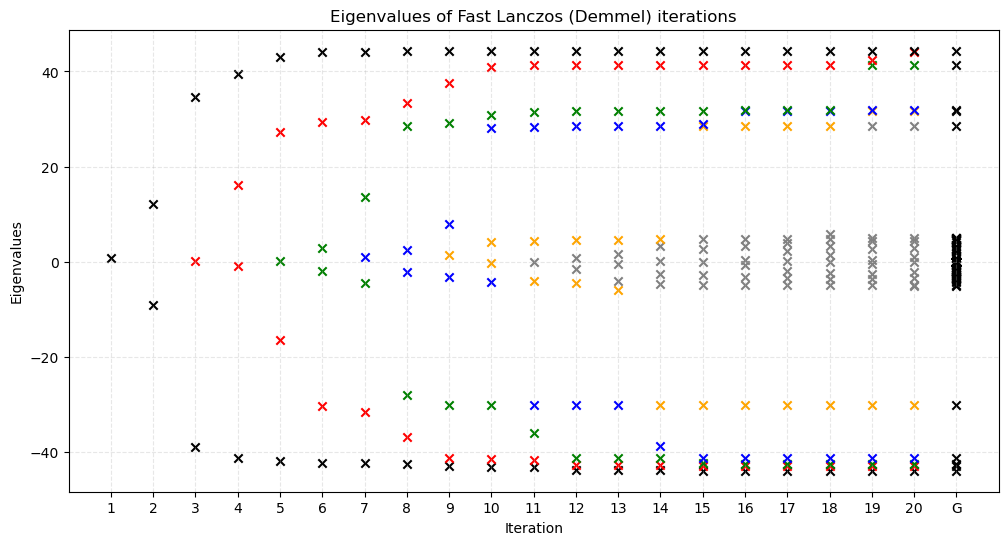

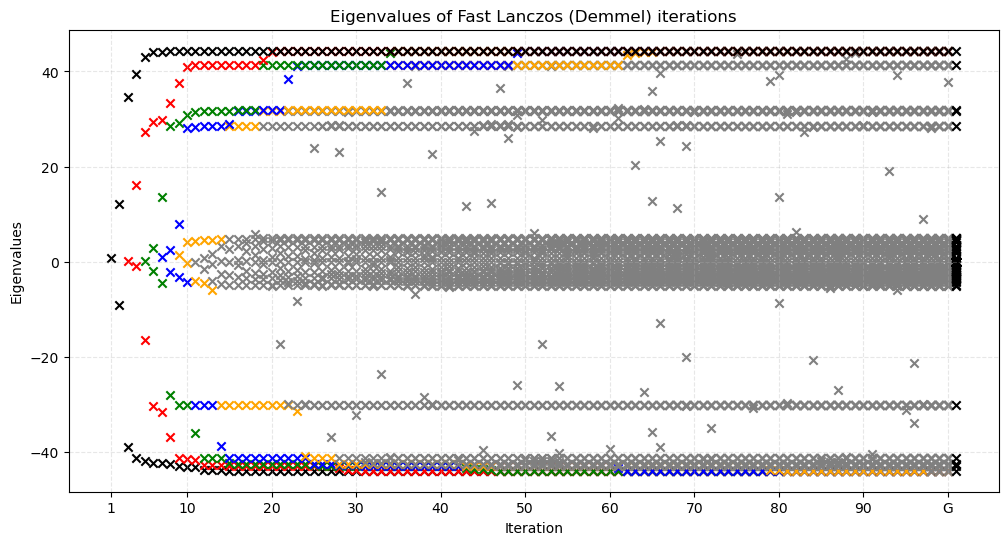

In [18]:
eigenvalues_fast_lanczos_demmel = []
for iter in range(num_iterations):
    result, _ = mtx.fast_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_fast_lanczos_demmel.append(result)
eigenvalues_fast_lanczos_demmel.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_demmel, "Fast Lanczos (Demmel)")
eigenvalues_fast_lanczos_demmel.pop()
for iter in range(num_iterations, 100):
    result, _ = mtx.fast_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_fast_lanczos_demmel.append(result)
eigenvalues_fast_lanczos_demmel.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_demmel, "Fast Lanczos (Demmel)")